In [2]:
# code to convert EFT LHE file (uncompressed) to a ROOT file with physics objects and weights
import numpy as np
import ROOT
import array
import math

#input file path
lhefile = "/Users/johno.aremu/Documents/pp2l2vNP1/unweighted_events.lhe"
root_file_path = "pp2l2vNP1.root"

#open the LHE file
root_file = ROOT.TFile(root_file_path, "RECREATE")
tree = ROOT.TTree("Events", "pp --> ZZ --> 2l2v EFT events")

# Define branches for the tree
run = array.array('i', [1])
luminosityBlock = array.array('I', [1])
event_number = array.array('L', [0])

#Muons
nMuon = array.array('I', [0])
Muon_pt = ROOT.std.vector('float')()
Muon_eta = ROOT.std.vector('float')()
Muon_phi = ROOT.std.vector('float')()
Muon_mass = ROOT.std.vector('float')()
Muon_charge = ROOT.std.vector('int')()

#Electrons
nElectron = array.array('I', [0])
Electron_pt = ROOT.std.vector('float')()
Electron_eta = ROOT.std.vector('float')()
Electron_phi = ROOT.std.vector('float')()
Electron_mass = ROOT.std.vector('float')()
Electron_charge = ROOT.std.vector('int')()

#Neutrinos
nNeutrino = array.array('I', [0])
Neutrino_pt = ROOT.std.vector('float')()
Neutrino_eta = ROOT.std.vector('float')()
Neutrino_phi = ROOT.std.vector('float')()
Neutrino_mass = ROOT.std.vector('float')()

#MET
MET_pt = array.array('f', [0.])
MET_phi = array.array('f', [0.])

#EFT weights
weight_SM = array.array('f', [0.])
weight_EFT1 = array.array('f', [0.])
weight_EFT2 = array.array('f', [0.])
weight_EFT3 = array.array('f', [0.])
weight_EFT4 = array.array('f', [0.])
weight_EFT5 = array.array('f', [0.])

#Define branches in the tree
tree.Branch("run", run, "run/I")
tree.Branch("luminosityBlock", luminosityBlock, "luminosityBlock/i")
tree.Branch("event", event_number, "event/l")

#Muons
tree.Branch("nMuon", nMuon, "nMuon/i")
tree.Branch("Muon_pt", Muon_pt)
tree.Branch("Muon_eta", Muon_eta)
tree.Branch("Muon_phi", Muon_phi)
tree.Branch("Muon_mass", Muon_mass)
tree.Branch("Muon_charge", Muon_charge)

#Electrons
tree.Branch("nElectron", nElectron, "nElectron/i")
tree.Branch("Electron_pt", Electron_pt)
tree.Branch("Electron_eta", Electron_eta)
tree.Branch("Electron_phi", Electron_phi)
tree.Branch("Electron_mass", Electron_mass)
tree.Branch("Electron_charge", Electron_charge)

#Neutrinos
tree.Branch("nNeutrino", nNeutrino, "nNeutrino/i")
tree.Branch("Neutrino_pt", Neutrino_pt)
tree.Branch("Neutrino_eta", Neutrino_eta)
tree.Branch("Neutrino_phi", Neutrino_phi)
tree.Branch("Neutrino_mass", Neutrino_mass)

#MET
tree.Branch("MET_pt", MET_pt, "MET_pt/F")
tree.Branch("MET_phi", MET_phi, "MET_phi/F")

#EFT weights
tree.Branch("weight_SM", weight_SM, "weight_SM/F")
tree.Branch("weight_EFT1", weight_EFT1, "weight_EFT1/F")
tree.Branch("weight_EFT2", weight_EFT2, "weight_EFT2/F")
tree.Branch("weight_EFT3", weight_EFT3, "weight_EFT3/F")
tree.Branch("weight_EFT4", weight_EFT4, "weight_EFT4/F")
tree.Branch("weight_EFT5", weight_EFT5, "weight_EFT5/F")

# Function to compute pt, eta, phi from px, py, pz
def compute_pt_eta_phi(px, py, pz):
    pt = math.sqrt(px**2 + py**2)
    p = math.sqrt(px**2 + py**2 + pz**2)
    eta = 0.5 * math.log((p + pz) / (p - pz)) if p != abs(pz) else 0
    phi = math.atan2(py, px)
    return pt, eta, phi

# Read the LHE file and fill the tree
with open(lhefile, 'r') as f:
    in_event = False
    in_weights = False
    event_lines = []
    weight_lines = []
    event_id = 0

    for line in f:
        line = line.strip()

        if line == "<event>":
            in_event = True
            event_lines = []
            weight_lines = []
        elif line == "</event>":
            in_event = False
            event_id += 1
            event_number[0] = event_id

            # reset all vectors
            Muon_pt.clear(); 
            Muon_eta.clear(); 
            Muon_phi.clear(); 
            Muon_mass.clear(); 
            Muon_charge.clear()
            Electron_pt.clear(); 
            Electron_eta.clear(); 
            Electron_phi.clear(); 
            Electron_mass.clear(); 
            Electron_charge.clear()
            Neutrino_pt.clear(); 
            Neutrino_eta.clear(); 
            Neutrino_phi.clear(); 
            Neutrino_mass.clear()

            met_px = 0.0
            met_py = 0.0

            # parse particles
            for p in event_lines[1:]:
                tokens = p.split()
                if len(tokens) < 11:
                    continue

                pdg_id = int(tokens[0])
                px = float(tokens[6]); py = float(tokens[7]); pz = float(tokens[8])
                E = float(tokens[9]); mass = float(tokens[10])

                charge = 0
                if pdg_id in [11, 13]: charge = -1
                elif pdg_id in [-11, -13]: charge = 1

                pt, eta, phi = compute_pt_eta_phi(px, py, pz)

                if abs(pdg_id) == 11:
                    Electron_pt.push_back(pt)
                    Electron_eta.push_back(eta)
                    Electron_phi.push_back(phi)
                    Electron_mass.push_back(mass)
                    Electron_charge.push_back(charge)
                elif abs(pdg_id) == 13:
                    Muon_pt.push_back(pt)
                    Muon_eta.push_back(eta)
                    Muon_phi.push_back(phi)
                    Muon_mass.push_back(mass)
                    Muon_charge.push_back(charge)
                elif abs(pdg_id) in [12, 14, 16]:
                    Neutrino_pt.push_back(pt)
                    Neutrino_eta.push_back(eta)
                    Neutrino_phi.push_back(phi)
                    Neutrino_mass.push_back(mass)

                    met_px += px
                    met_py += py

            # parse weights
            weight_SM[0] = 0.0
            for i in range(1, 6):
                globals()[f"weight_EFT{i}"][0] = 0.0

            if weight_lines:
                w = [float(x.split(">")[1].split("<")[0]) for x in weight_lines if "<wgt" in x]
                if len(w) >= 1: weight_SM[0] = w[0]
                for i in range(1, min(6, len(w))):
                    globals()[f"weight_EFT{i}"][0] = w[i]

            # finalize counts
            nMuon[0] = Muon_pt.size()
            nElectron[0] = Electron_pt.size()
            nNeutrino[0] = Neutrino_pt.size()

            MET_pt[0] = np.sqrt(met_px**2 + met_py**2)
            MET_phi[0] = np.arctan2(met_py, met_px)

            tree.Fill()

        elif in_event:
            if line.startswith("<rwgt>"):
                in_weights = True
            elif line.startswith("</rwgt>"):
                in_weights = False
            elif in_weights:
                weight_lines.append(line)
            else:
                event_lines.append(line)

# write file
root_file.Write()
root_file.Close()
print(f"Finished writing ROOT file: {root_file_path}")
print(f"Total events processed: {event_id}")

Finished writing ROOT file: pp2l2vNP1.root
Total events processed: 10000


In [2]:
import uproot
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import hist
import vector

vector.register_awkward()

file = uproot.open("pp2l2vNP1.root")
tree = file["Events"]

#check the branches in the tree
tree.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
run                  | int32_t                  | AsDtype('>i4')
luminosityBlock      | uint32_t                 | AsDtype('>u4')
event                | uint64_t                 | AsDtype('>u8')
nMuon                | uint32_t                 | AsDtype('>u4')
Muon_pt              | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
Muon_eta             | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
Muon_phi             | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
Muon_mass            | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
Muon_charge          | std::vector<int32_t>     | AsJagged(AsDtype('>i4'), he...
nElectron            | uint32_t                 | AsDtype('>u4')
Electron_pt          | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
Electron_eta         | std:

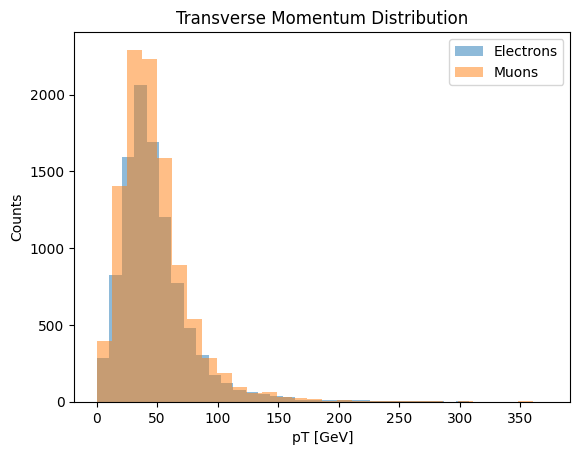

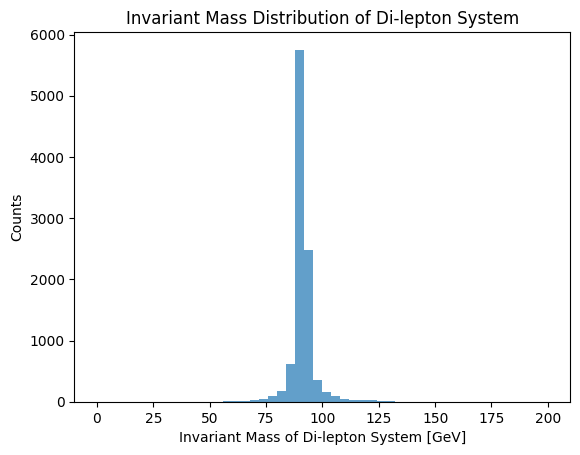

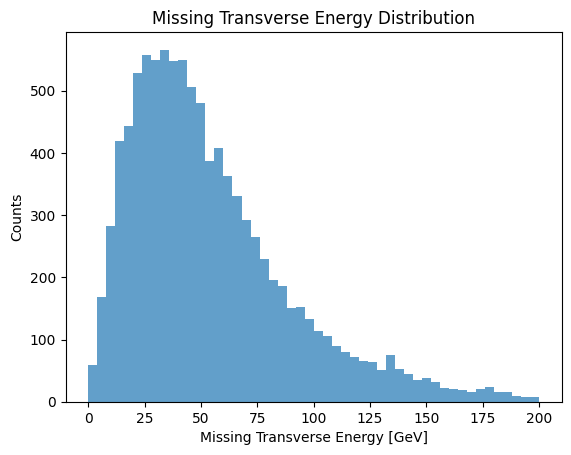

In [10]:
#sm analysis
mu_events = tree.arrays(filter_name="Muon_*", library="ak")
elec_events = tree.arrays(filter_name="Electron_*", library="ak")
nu_events = tree.arrays(filter_name="Neutrino_*", library="ak")

muons = ak.zip({
    "pt": mu_events["Muon_pt"],
    "eta": mu_events["Muon_eta"],
    "phi": mu_events["Muon_phi"],
    "mass": mu_events["Muon_mass"],
    "charge": mu_events["Muon_charge"]
}, with_name="Momentum4D")

electrons = ak.zip({
    "pt": elec_events["Electron_pt"],
    "eta": elec_events["Electron_eta"],
    "phi": elec_events["Electron_phi"],
    "mass": elec_events["Electron_mass"],
    "charge": elec_events["Electron_charge"]
}, with_name="Momentum4D")

neutrinos = ak.zip({
    "pt": nu_events["Neutrino_pt"],
    "eta": nu_events["Neutrino_eta"],
    "phi": nu_events["Neutrino_phi"],
    "mass": nu_events["Neutrino_mass"]
}, with_name="Momentum4D")

# Plot pT distributions for electrons and muons
electron_pts = ak.flatten(elec_events.Electron_pt)
muon_pts = ak.flatten(mu_events.Muon_pt)

plt.hist(electron_pts, bins=30, alpha=0.5, label="Electrons")
plt.hist(muon_pts, bins=30, alpha=0.5, label="Muons")
plt.xlabel("pT [GeV]")
plt.ylabel("Counts")
plt.title("Transverse Momentum Distribution")
plt.legend()
plt.show()


#invariant mass of di-lepton system
leptons = ak.concatenate([muons, electrons], axis=1)
lepton_pairs = ak.combinations(leptons, 2, fields=["l1", "l2"])
z_candidates = lepton_pairs[(lepton_pairs.l1.charge + lepton_pairs.l2.charge) == 0]
z_invariant_masses = (z_candidates.l1 + z_candidates.l2).mass
plt.hist(ak.flatten(z_invariant_masses), bins=50, range=(0, 200), histtype='stepfilled', alpha=0.7)
plt.xlabel("Invariant Mass of Di-lepton System [GeV]")
plt.ylabel("Counts")
plt.title("Invariant Mass Distribution of Di-lepton System")
plt.show()

#missing transverse energy distribution
met_pts = tree.arrays(filter_name="MET_pt", library="ak")["MET_pt"]
plt.hist((met_pts), bins=50, range=(0, 200), histtype='stepfilled', alpha=0.7)
plt.xlabel("Missing Transverse Energy [GeV]")
plt.ylabel("Counts")
plt.title("Missing Transverse Energy Distribution")
plt.show()

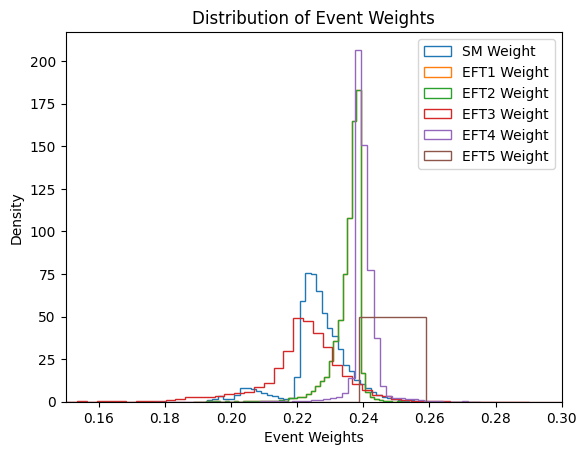

In [17]:
#EFT weights distribution
weights = tree.arrays(filter_name="weight_*", library="ak")
weight_SM = weights["weight_SM"]
weight_EFT1 = weights["weight_EFT1"]
weight_EFT2 = weights["weight_EFT2"]
weight_EFT3 = weights["weight_EFT3"]
weight_EFT4 = weights["weight_EFT4"]
weight_EFT5 = weights["weight_EFT5"]

plt.hist((weight_SM), bins=50, histtype='step', label='SM Weight', density=True)
plt.hist((weight_EFT1), bins=50, histtype='step', label='EFT1 Weight', density=True)
plt.hist((weight_EFT2), bins=50, histtype='step', label='EFT2 Weight', density=True)
plt.hist((weight_EFT3), bins=50, histtype='step', label='EFT3 Weight', density=True)
plt.hist((weight_EFT4), bins=50, histtype='step', label='EFT4 Weight', density=True)
plt.hist((weight_EFT5), bins=50, histtype='step', label='EFT5 Weight', density=True)
plt.xlabel("Event Weights")
plt.ylabel("Density")
plt.xlim(0.15, 0.3)
plt.title("Distribution of Event Weights")
plt.legend()
plt.show()

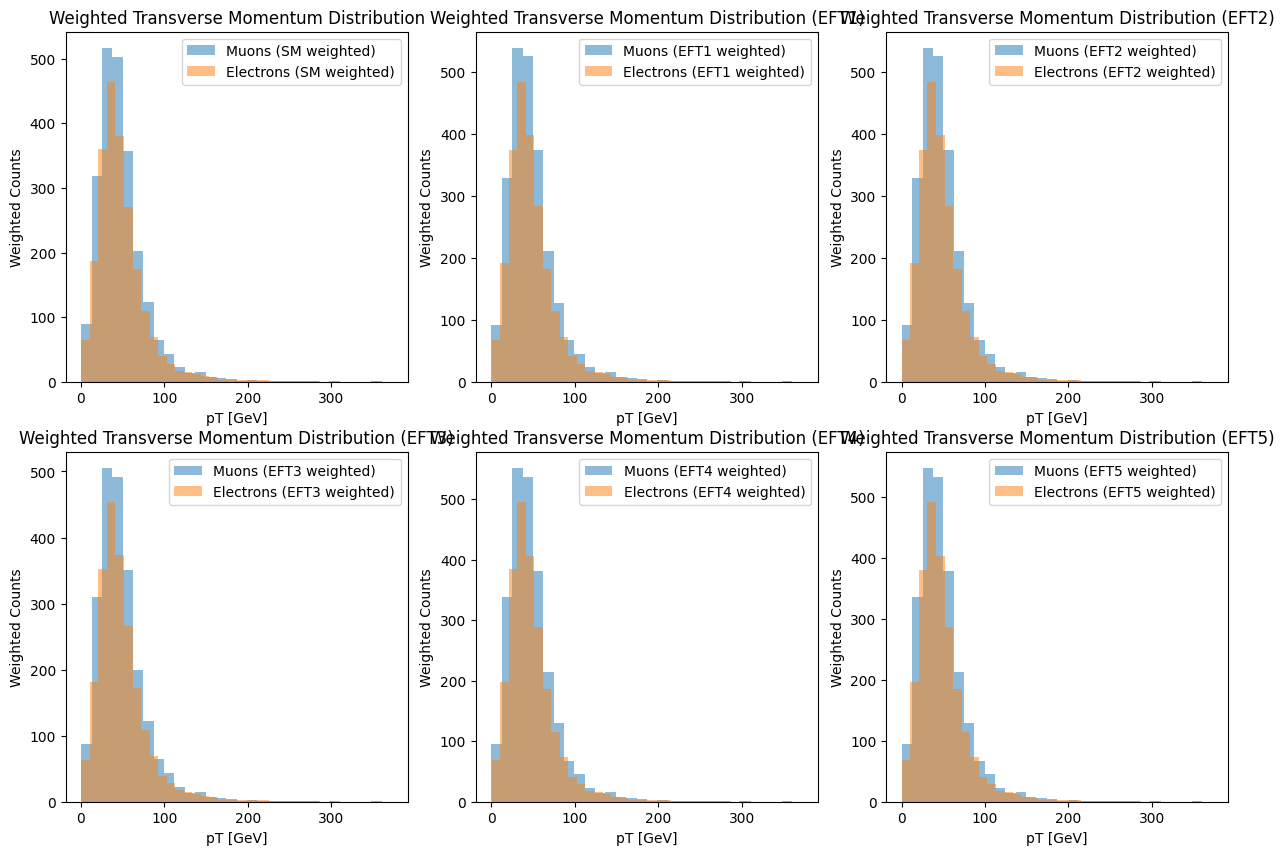

In [39]:
#weighted histograms for eft analysis with muon pT and electron pT
muon_pt = ak.flatten(mu_events.Muon_pt)
electron_pt = ak.flatten(elec_events.Electron_pt)

#broadcast and flatten for sm weights
muon_weights = ak.flatten(ak.broadcast_arrays(weight_SM, mu_events.Muon_pt)[0])
electron_weights = ak.flatten(ak.broadcast_arrays(weight_SM, elec_events.Electron_pt)[0])
muweights_array = ak.to_numpy(muon_weights)
eleweights_array = ak.to_numpy(electron_weights)

#plot into one figure with 6 subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.ravel()

axs[0].hist(muon_pt, bins=30, weights=muweights_array, alpha=0.5, label="Muons (SM weighted)")
axs[0].hist(electron_pt, bins=30, weights=eleweights_array, alpha=0.5, label="Electrons (SM weighted)")
axs[0].set_xlabel("pT [GeV]")
axs[0].set_ylabel("Weighted Counts")
axs[0].set_title("Weighted Transverse Momentum Distribution")
axs[0].legend()

#broadcast and flatten for eft weights
muon_weights_EFT1 = ak.flatten(ak.broadcast_arrays(weight_EFT1, mu_events.Muon_pt)[0])
electron_weights_EFT1 = ak.flatten(ak.broadcast_arrays(weight_EFT1, elec_events.Electron_pt)[0])
muweights_EFT1_array = ak.to_numpy(muon_weights_EFT1)
eleweights_EFT1_array = ak.to_numpy(electron_weights_EFT1)
axs[1].hist(muon_pt, bins=30, weights=muweights_EFT1_array, alpha=0.5, label="Muons (EFT1 weighted)")
axs[1].hist(electron_pt, bins=30, weights=eleweights_EFT1_array, alpha=0.5, label="Electrons (EFT1 weighted)")
axs[1].set_xlabel("pT [GeV]")
axs[1].set_ylabel("Weighted Counts")
axs[1].set_title("Weighted Transverse Momentum Distribution (EFT1)")
axs[1].legend()

muon_weights_EFT2 = ak.flatten(ak.broadcast_arrays(weight_EFT2, mu_events.Muon_pt)[0])
electron_weights_EFT2 = ak.flatten(ak.broadcast_arrays(weight_EFT2, elec_events.Electron_pt)[0])
muweights_EFT2_array = ak.to_numpy(muon_weights_EFT2)
eleweights_EFT2_array = ak.to_numpy(electron_weights_EFT2)
axs[2].hist(muon_pt, bins=30, weights=muweights_EFT2_array, alpha=0.5, label="Muons (EFT2 weighted)")
axs[2].hist(electron_pt, bins=30, weights=eleweights_EFT2_array, alpha=0.5, label="Electrons (EFT2 weighted)")
axs[2].set_xlabel("pT [GeV]")
axs[2].set_ylabel("Weighted Counts")
axs[2].set_title("Weighted Transverse Momentum Distribution (EFT2)")
axs[2].legend()

muon_weights_EFT3 = ak.flatten(ak.broadcast_arrays(weight_EFT3, mu_events.Muon_pt)[0])
electron_weights_EFT3 = ak.flatten(ak.broadcast_arrays(weight_EFT3, elec_events.Electron_pt)[0])
muweights_EFT3_array = ak.to_numpy(muon_weights_EFT3)
eleweights_EFT3_array = ak.to_numpy(electron_weights_EFT3)
axs[3].hist(muon_pt, bins=30, weights=muweights_EFT3_array, alpha=0.5, label="Muons (EFT3 weighted)")
axs[3].hist(electron_pt, bins=30, weights=eleweights_EFT3_array, alpha=0.5, label="Electrons (EFT3 weighted)")
axs[3].set_xlabel("pT [GeV]")
axs[3].set_ylabel("Weighted Counts")
axs[3].set_title("Weighted Transverse Momentum Distribution (EFT3)")
axs[3].legend()

muon_weights_EFT4 = ak.flatten(ak.broadcast_arrays(weight_EFT4, mu_events.Muon_pt)[0])
electron_weights_EFT4 = ak.flatten(ak.broadcast_arrays(weight_EFT4, elec_events.Electron_pt)[0])
muweights_EFT4_array = ak.to_numpy(muon_weights_EFT4)
eleweights_EFT4_array = ak.to_numpy(electron_weights_EFT4)
axs[4].hist(muon_pt, bins=30, weights=muweights_EFT4_array, alpha=0.5, label="Muons (EFT4 weighted)")
axs[4].hist(electron_pt, bins=30, weights=eleweights_EFT4_array, alpha=0.5, label="Electrons (EFT4 weighted)")
axs[4].set_xlabel("pT [GeV]")
axs[4].set_ylabel("Weighted Counts")
axs[4].set_title("Weighted Transverse Momentum Distribution (EFT4)")
axs[4].legend()

muon_weights_EFT5 = ak.flatten(ak.broadcast_arrays(weight_EFT5, mu_events.Muon_pt)[0])
electron_weights_EFT5 = ak.flatten(ak.broadcast_arrays(weight_EFT5, elec_events.Electron_pt)[0])
muweights_EFT5_array = ak.to_numpy(muon_weights_EFT5)
eleweights_EFT5_array = ak.to_numpy(electron_weights_EFT5)
axs[5].hist(muon_pt, bins=30, weights=muweights_EFT5_array, alpha=0.5, label="Muons (EFT5 weighted)")
axs[5].hist(electron_pt, bins=30, weights=eleweights_EFT5_array, alpha=0.5, label="Electrons (EFT5 weighted)")
axs[5].set_xlabel("pT [GeV]")
axs[5].set_ylabel("Weighted Counts")
axs[5].set_title("Weighted Transverse Momentum Distribution (EFT5)")
axs[5].legend()


Weight set 0: mean=0.226203, std=0.009097, min=0.192715, max=0.275256
Weight set 1: mean=0.235341, std=0.004441, min=0.188452, max=0.257077
Weight set 2: mean=0.235341, std=0.004441, min=0.188453, max=0.257077
Weight set 3: mean=0.221935, std=0.012680, min=0.141621, max=0.290047
Weight set 4: mean=0.240092, std=0.003888, min=0.176571, max=0.271639
Weight set 5: mean=0.238829, std=nan, min=0.238829, max=0.238829


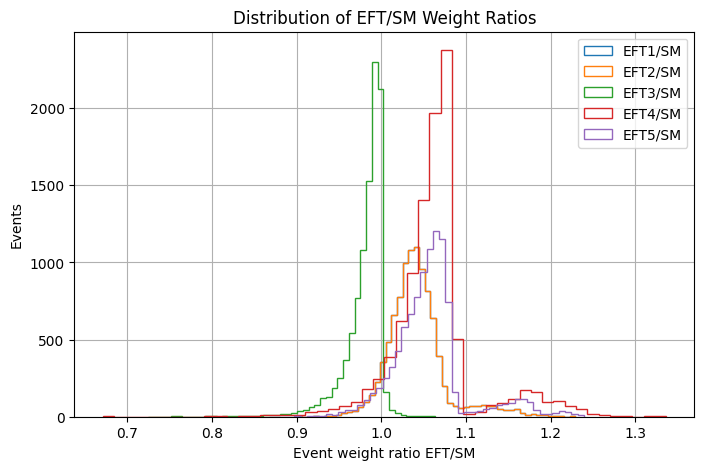

In [41]:
for i, w in enumerate([weight_SM, weight_EFT1, weight_EFT2, weight_EFT3, weight_EFT4, weight_EFT5], start=0):
    print(f"Weight set {i}: mean={ak.mean(w):.6f}, std={ak.std(w):.6f}, min={ak.min(w):.6f}, max={ak.max(w):.6f}")

ratios = [
    weight_EFT1 / weight_SM,
    weight_EFT2 / weight_SM,
    weight_EFT3 / weight_SM,
    weight_EFT4 / weight_SM,
    weight_EFT5 / weight_SM
]

plt.figure(figsize=(8,5))
for i, r in enumerate(ratios, start=1):
    plt.hist(ak.to_numpy(r), bins=50, histtype="step", label=f"EFT{i}/SM")
plt.xlabel("Event weight ratio EFT/SM")
plt.ylabel("Events")
plt.title("Distribution of EFT/SM Weight Ratios")
plt.legend()
plt.grid(True)
plt.show()

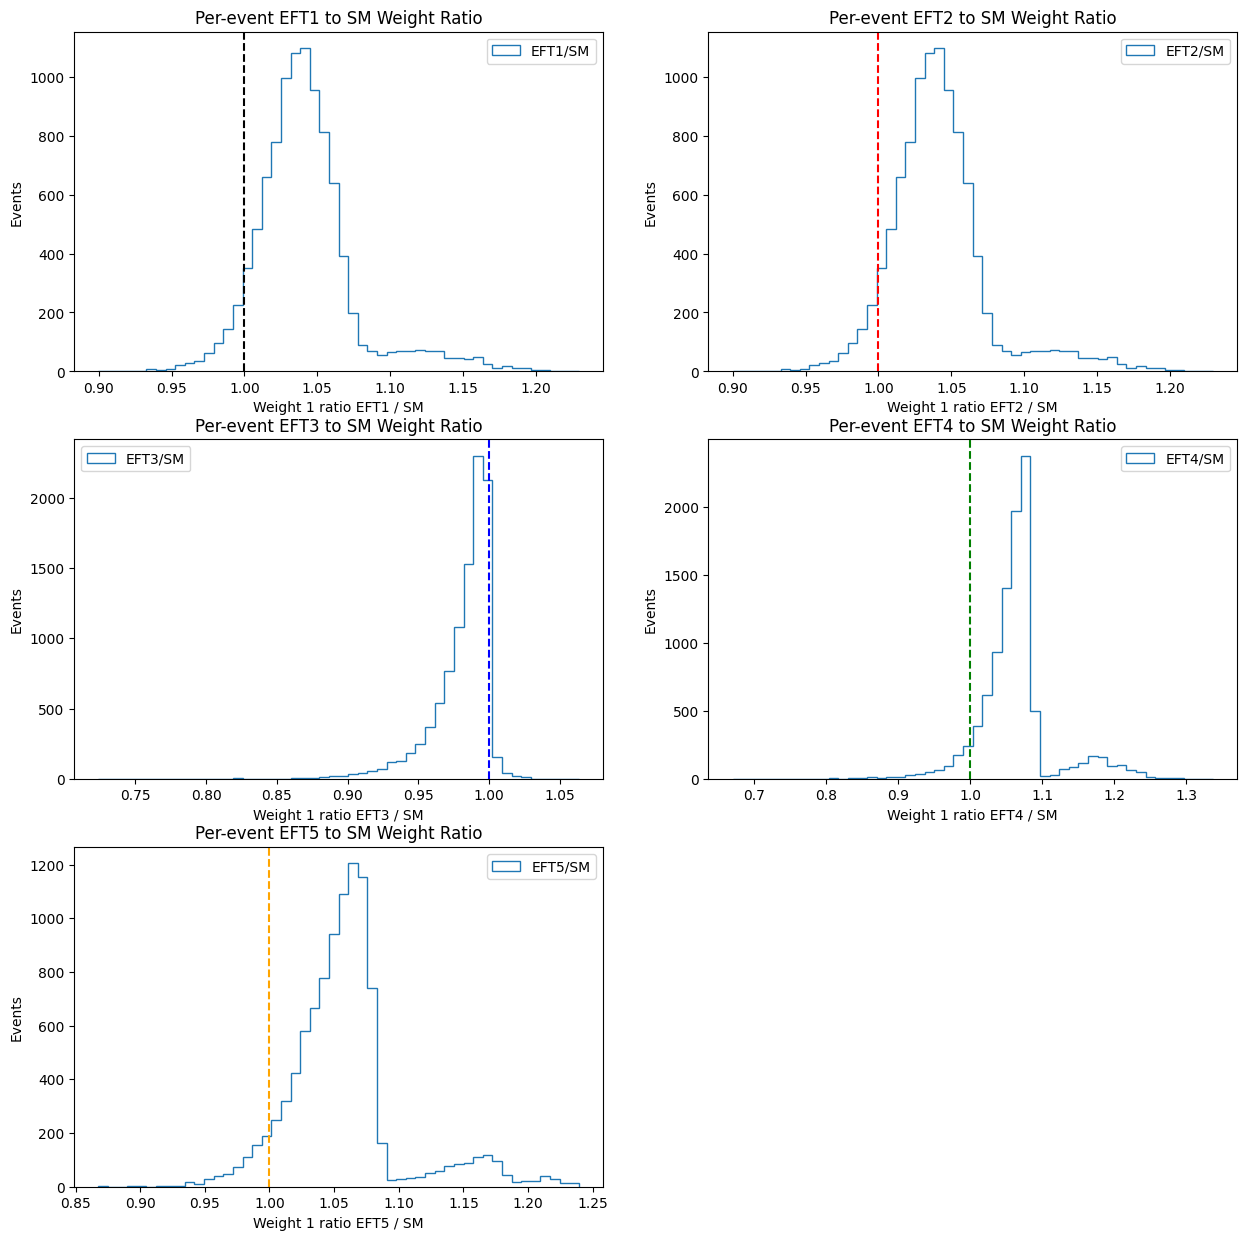

In [51]:
plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
plt.hist(ak.to_numpy(weight_EFT1 / weight_SM), bins=50, histtype='step', label='EFT1/SM')
plt.axvline(1, color='black', linestyle='--')
plt.xlabel("Weight 1 ratio EFT1 / SM")
plt.ylabel("Events")
plt.title("Per-event EFT1 to SM Weight Ratio")
plt.legend()

plt.subplot(3,2,2)
plt.hist(ak.to_numpy(weight_EFT2 / weight_SM), bins=50, histtype='step', label='EFT2/SM')
plt.axvline(1, color='red', linestyle='--')
plt.xlabel("Weight 1 ratio EFT2 / SM")
plt.ylabel("Events")
plt.title("Per-event EFT2 to SM Weight Ratio")
plt.legend()

plt.subplot(3,2,3)
plt.hist(ak.to_numpy(weight_EFT3 / weight_SM), bins=50, histtype='step', label='EFT3/SM')
plt.axvline(1, color='blue', linestyle='--')
plt.xlabel("Weight 1 ratio EFT3 / SM")
plt.ylabel("Events")
plt.title("Per-event EFT3 to SM Weight Ratio")
plt.legend()

plt.subplot(3,2,4)
plt.hist(ak.to_numpy(weight_EFT4 / weight_SM), bins=50, histtype='step', label='EFT4/SM')
plt.axvline(1, color='green', linestyle='--')
plt.xlabel("Weight 1 ratio EFT4 / SM")
plt.ylabel("Events")
plt.title("Per-event EFT4 to SM Weight Ratio")
plt.legend()
    
plt.subplot(3,2,5)
plt.hist(ak.to_numpy(weight_EFT5 / weight_SM), bins=50, histtype='step', label='EFT5/SM')
plt.axvline(1, color='orange', linestyle='--')
plt.xlabel("Weight 1 ratio EFT5 / SM")
plt.ylabel("Events")
plt.title("Per-event EFT5 to SM Weight Ratio")
plt.legend()
plt.show()